In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [5]:
# read in all the words
words = open('/content/sample_data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [6]:
len(words)

32033

In [7]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [35]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y



torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [36]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [37]:
# create embedding matrix to represent the 27 char to 2 dimensional only
C = torch.randn((27, 2))
C

tensor([[ 1.7342,  0.5531],
        [-0.7402,  0.3484],
        [-0.8633, -0.3491],
        [-0.6402,  0.3826],
        [-0.4960, -1.3237],
        [-0.9624, -0.4645],
        [ 0.0452,  0.8804],
        [-1.1044, -0.0509],
        [ 0.9452, -0.6294],
        [-1.0733,  2.2758],
        [ 0.7938,  0.1050],
        [-0.0620, -0.4036],
        [-0.3160,  1.7467],
        [-0.0068,  0.1589],
        [ 1.1806,  1.1149],
        [-1.5221, -0.1874],
        [ 1.2294, -0.5758],
        [-1.9578, -0.3836],
        [-0.5618, -0.0324],
        [-0.6801, -0.8232],
        [-0.1072,  2.0982],
        [-1.1211,  0.7609],
        [ 1.3794, -0.2806],
        [-0.1419, -2.7827],
        [-1.2866, -1.3947],
        [-0.2635, -0.1288],
        [-0.0368, -0.9132]])

In [38]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [39]:
# mapping the X (input) to the embedding
emb = C[X]
emb

tensor([[[ 1.7342,  0.5531],
         [ 1.7342,  0.5531],
         [ 1.7342,  0.5531]],

        [[ 1.7342,  0.5531],
         [ 1.7342,  0.5531],
         [-0.9624, -0.4645]],

        [[ 1.7342,  0.5531],
         [-0.9624, -0.4645],
         [-0.0068,  0.1589]],

        ...,

        [[-0.0368, -0.9132],
         [-0.0368, -0.9132],
         [-0.2635, -0.1288]],

        [[-0.0368, -0.9132],
         [-0.2635, -0.1288],
         [-0.0368, -0.9132]],

        [[-0.2635, -0.1288],
         [-0.0368, -0.9132],
         [-1.2866, -1.3947]]])

In [40]:
emb.shape

torch.Size([228146, 3, 2])

In [41]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [42]:
len(torch.unbind(emb, 1))

3

In [43]:
torch.unbind(emb, 1)[0]

tensor([[ 1.7342,  0.5531],
        [ 1.7342,  0.5531],
        [ 1.7342,  0.5531],
        ...,
        [-0.0368, -0.9132],
        [-0.0368, -0.9132],
        [-0.2635, -0.1288]])

In [44]:
torch.unbind(emb, 1)[0].shape

torch.Size([228146, 2])

In [45]:
# so I have 3 of the (228146, 2), and I want to make it (228146, 6)
torch.cat(torch.unbind(emb, 1),1)

tensor([[ 1.7342,  0.5531,  1.7342,  0.5531,  1.7342,  0.5531],
        [ 1.7342,  0.5531,  1.7342,  0.5531, -0.9624, -0.4645],
        [ 1.7342,  0.5531, -0.9624, -0.4645, -0.0068,  0.1589],
        ...,
        [-0.0368, -0.9132, -0.0368, -0.9132, -0.2635, -0.1288],
        [-0.0368, -0.9132, -0.2635, -0.1288, -0.0368, -0.9132],
        [-0.2635, -0.1288, -0.0368, -0.9132, -1.2866, -1.3947]])

In [46]:
torch.cat(torch.unbind(emb, 1),1).shape

torch.Size([228146, 6])

In [47]:
# we can do it with view, which gives the exact same result, but more efficient under the hood
emb.view(228146, 6)

tensor([[ 1.7342,  0.5531,  1.7342,  0.5531,  1.7342,  0.5531],
        [ 1.7342,  0.5531,  1.7342,  0.5531, -0.9624, -0.4645],
        [ 1.7342,  0.5531, -0.9624, -0.4645, -0.0068,  0.1589],
        ...,
        [-0.0368, -0.9132, -0.0368, -0.9132, -0.2635, -0.1288],
        [-0.0368, -0.9132, -0.2635, -0.1288, -0.0368, -0.9132],
        [-0.2635, -0.1288, -0.0368, -0.9132, -1.2866, -1.3947]])

In [48]:
# so finally we can do dot product of the weight and inputs:
# note: -1 will automatically do emb.shape[0]
emb.view(-1, 6) @ W1 + b1

tensor([[-1.3452,  0.1835, -0.3047,  ..., -2.1126, -0.4407,  0.8031],
        [ 4.1061,  0.4740,  0.3838,  ..., -1.9395, -0.6541,  2.8079],
        [-1.3587,  2.3916,  0.6522,  ...,  1.0800, -3.6780, -2.9505],
        ...,
        [ 0.7872,  0.7203, -0.3487,  ...,  2.2531,  1.1472,  0.1096],
        [ 1.8845,  3.6258, -0.1633,  ..., -0.2796, -0.5992, -0.4307],
        [ 3.0079,  3.7131,  1.3282,  ...,  3.3386,  0.4986,  0.7114]])

In [49]:
# do tanh for non linearity
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
# note: this W1 + b1 will do broadcasting as follows:
# W1 (228146, 100)
# b1 (100)
# =>
# W1 (228146, 100)
# b1 (     1, 100) => so this is correct, because we wanna do row wise sum!
h

tensor([[-0.8729,  0.1814, -0.2956,  ..., -0.9712, -0.4142,  0.6657],
        [ 0.9995,  0.4414,  0.3660,  ..., -0.9595, -0.5744,  0.9927],
        [-0.8761,  0.9834,  0.5731,  ...,  0.7932, -0.9987, -0.9945],
        ...,
        [ 0.6568,  0.6171, -0.3352,  ...,  0.9782,  0.8168,  0.1091],
        [ 0.9549,  0.9986, -0.1619,  ..., -0.2726, -0.5365, -0.4059],
        [ 0.9951,  0.9988,  0.8688,  ...,  0.9975,  0.4610,  0.6115]])

In [50]:
h.shape

torch.Size([228146, 100])

In [51]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [52]:
logits = h @ W2 + b2

In [53]:
logits.shape

torch.Size([228146, 27])

In [54]:
counts = logits.exp()

In [55]:
# so softmax activation function
prob = counts / counts.sum(1, keepdims=True)

In [56]:
prob.shape

torch.Size([228146, 27])

In [57]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [58]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [59]:
for p in parameters:
  p.requires_grad = True

In [60]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [62]:
lri = []
lossi = []
stepi = []

In [63]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

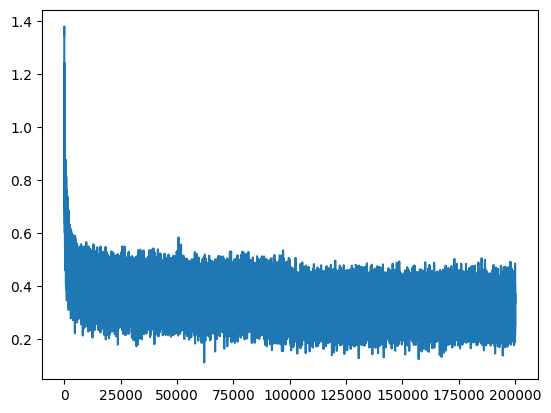

In [64]:
plt.plot(stepi, lossi)

In [65]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1306, grad_fn=<NllLossBackward0>)

In [66]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1614, grad_fn=<NllLossBackward0>)

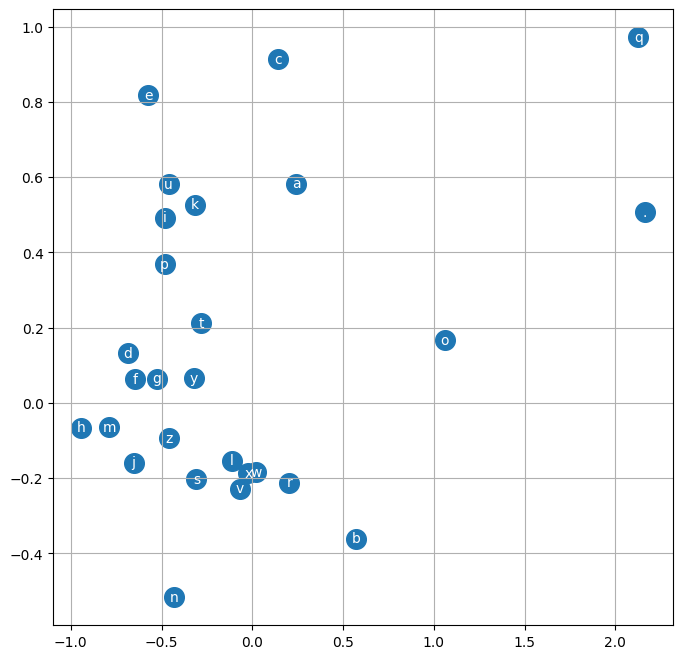

In [67]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [68]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [69]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [70]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mora.
kayah.
see.
med.
ryla.
rethruthad.
leg.
aderedielin.
shi.
jenleigh.
estanartelle.
malaia.
noselbergshimier.
kin.
renelipanthusti.
brence.
ryyah.
fiel.
yuma.
miston.
